In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

In [ ]:
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])

In [ ]:
merged_df = transactions_df.merge(customers_df, on="CustomerID").merge(products_df, on="ProductID")


In [ ]:
print("Transactions Summary:")
print(merged_df.describe())


Transactions Summary:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              202

In [ ]:
print("\nMissing Values:")
print(merged_df.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


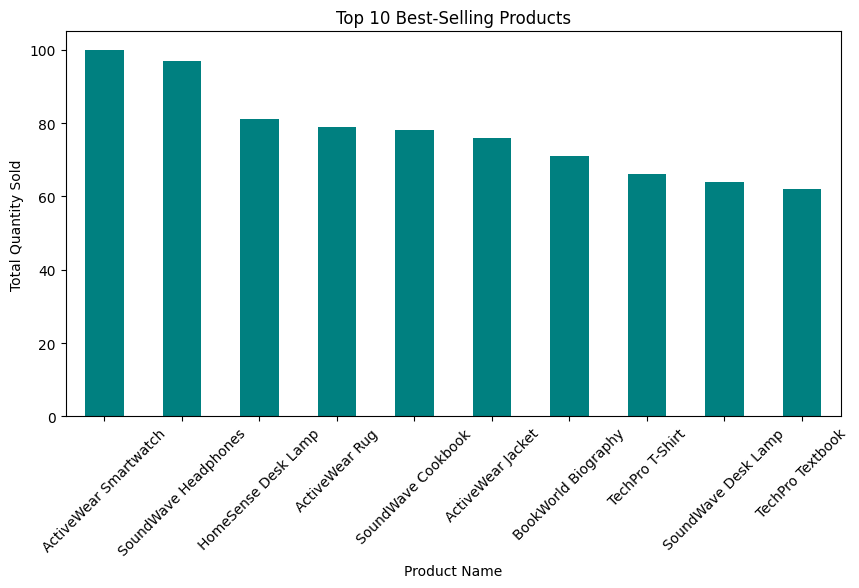

In [ ]:
top_products = merged_df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5), color='teal')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

<ipython-input-8-74dd55ad8216>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="coolwarm")


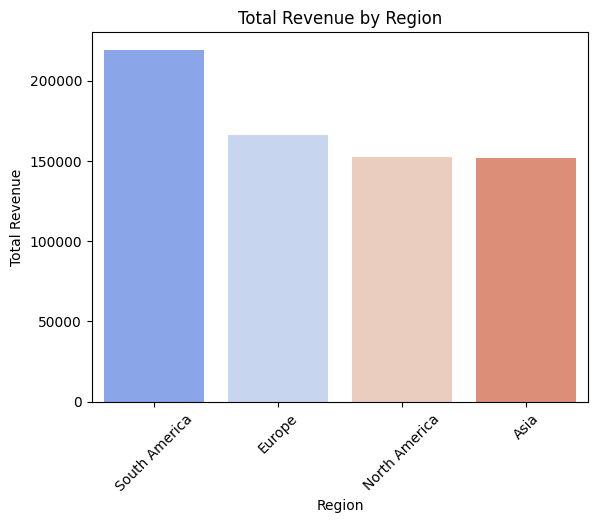

In [ ]:
revenue_by_region = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette="coolwarm")
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


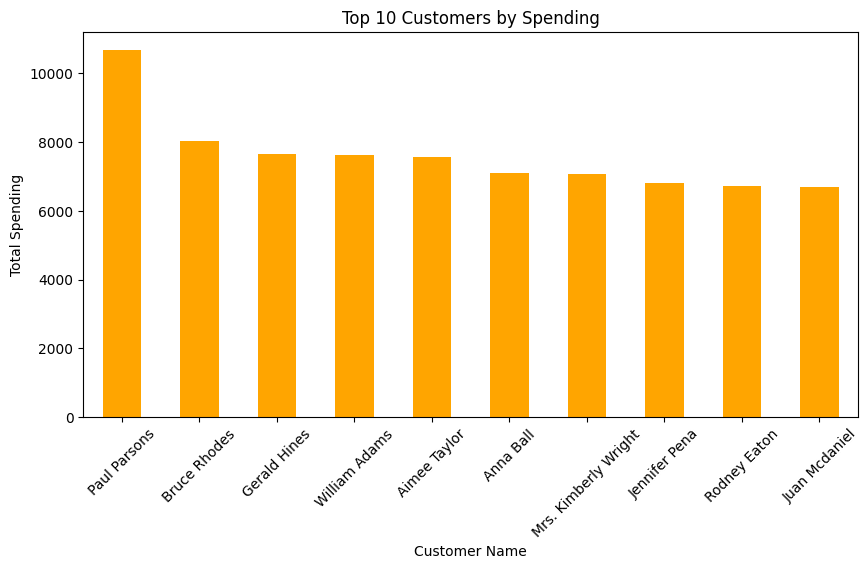

In [ ]:
top_customers = merged_df.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Top 10 Customers by Spending")
plt.xlabel("Customer Name")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()

<ipython-input-10-766380d16e46>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


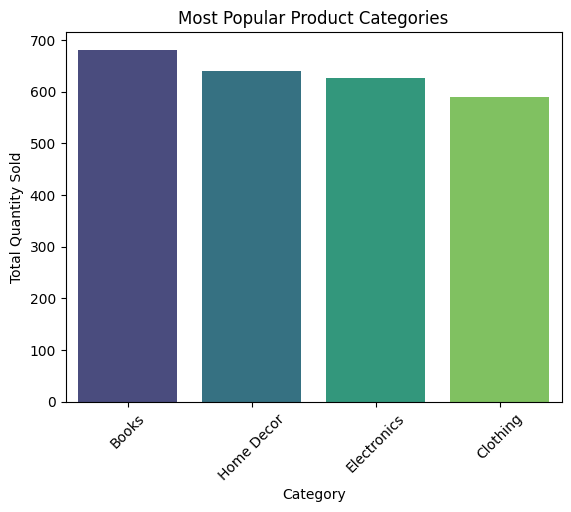

In [ ]:
top_categories = merged_df.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Most Popular Product Categories")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

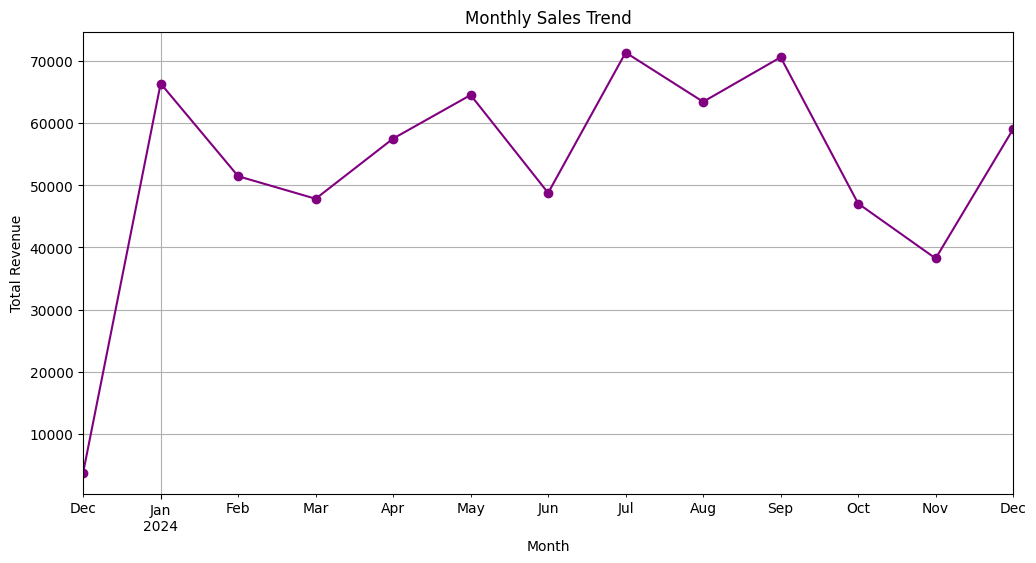

In [ ]:
merged_df["Month"] = merged_df["TransactionDate"].dt.to_period("M")
monthly_sales = merged_df.groupby("Month")["TotalValue"].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(12,6), color='purple')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()